In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [2]:
# you can download models from here: https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classes = {0: u'__background__',
 1: u'person',
 2: u'bicycle',
 3: u'car',
 4: u'motorcycle',
 5: u'airplane',
 6: u'bus',
 7: u'train',
 8: u'truck',
 9: u'boat',
 10: u'traffic light',
 11: u'fire hydrant',
 12: u'stop sign',
 13: u'parking meter',
 14: u'bench',
 15: u'bird',
 16: u'cat',
 17: u'dog',
 18: u'horse',
 19: u'sheep',
 20: u'cow',
 21: u'elephant',
 22: u'bear',
 23: u'zebra',
 24: u'giraffe',
 25: u'backpack',
 26: u'umbrella',
 27: u'handbag',
 28: u'tie',
 29: u'suitcase',
 30: u'frisbee',
 31: u'skis',
 32: u'snowboard',
 33: u'sports ball',
 34: u'kite',
 35: u'baseball bat',
 36: u'baseball glove',
 37: u'skateboard',
 38: u'surfboard',
 39: u'tennis racket',
 40: u'bottle',
 41: u'wine glass',
 42: u'cup',
 43: u'fork',
 44: u'knife',
 45: u'spoon',
 46: u'bowl',
 47: u'banana',
 48: u'apple',
 49: u'sandwich',
 50: u'orange',
 51: u'broccoli',
 52: u'carrot',
 53: u'hot dog',
 54: u'pizza',
 55: u'donut',
 56: u'cake',
 57: u'chair',
 58: u'couch',
 59: u'potted plant',
 60: u'bed',
 61: u'dining table',
 62: u'toilet',
 63: u'tv',
 64: u'laptop',
 65: u'mouse',
 66: u'remote',
 67: u'keyboard',
 68: u'cell phone',
 69: u'microwave',
 70: u'oven',
 71: u'toaster',
 72: u'sink',
 73: u'refrigerator',
 74: u'book',
 75: u'clock',
 76: u'vase',
 77: u'scissors',
 78: u'teddy bear',
 79: u'hair drier',
 80: u'toothbrush'}

See how it works on an image

In [5]:
image = cv2.imread("365494_0.jpg")

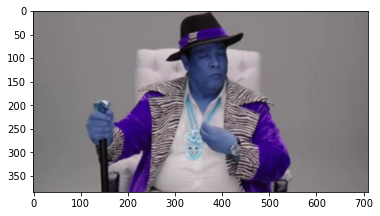

In [6]:
plt.imshow(image)

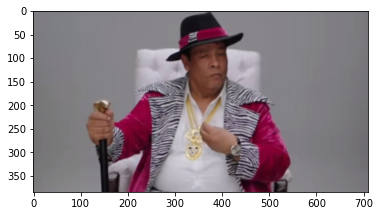

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Prepare the data for the model

In [8]:
model.setInputSize(320, 320)

<dnn_Model 000001383B50B7D0>

In [9]:
#understand these
model.setInputMean((127.5, 127.5, 127.5))
model.setInputScale(1.0/127.5)
model.setInputSwapRB(True)

<dnn_Model 000001383E8B7B30>

For the inference

In [10]:
ClassIndex, confidence, bbox = model.detect(image, confThreshold=0.6)

In [11]:
print(ClassIndex)

[1]


In [12]:
print(confidence)

[0.6590601]


In [13]:
print(bbox)

[[102   2 468 381]]


In [14]:
for Class, conf, box in zip(ClassIndex, confidence, bbox):
    cv2.rectangle(image, box, (255, 0, 0))
    cv2.putText(image, classes[Class], (box[0]+10, box[1]+25), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255))

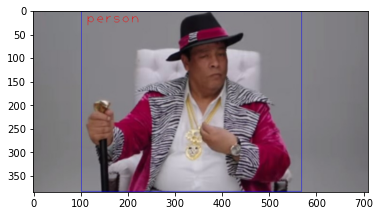

In [15]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Detect from your webcam 

In [ ]:
capture = cv2.VideoCapture(-1)

if not capture.isOpened():
    capture = cv2.VideoCapture(0)
if not capture.isOpened():
    capture = cv2.VideoCapture(1)
if not capture.isOpened():
    raise IDError('Cannot open webcam')
    
font = cv2.FONT_HERSHEY_PLAIN
scale = 2

while True:
    ret, frame = capture.read()
    # understand the return    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.7)
    
    #print(ClassIndex)
    if(len(ClassIndex) != 0):
        for Class, conf, box in zip(ClassIndex, confidence, bbox):
            if(Class <= 80):
                cv2.rectangle(frame, box, (255, 0, 0))
                cv2.putText(frame, classes[Class], (box[0]+15, box[1]+30), cv2.FONT_HERSHEY_DUPLEX , 2, (0, 0, 255))
            
    cv2.imshow('Transfer learning session', frame)
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
capture.release()
cv2.destroyAllWindows()